In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth" , "fSize", "fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df= pd.read_csv("/content/magic04.data", names=cols) #names attribute names the columns as per the list cols
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique() #values of the column class
# it is in string, so now converting them to 1 and 0
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

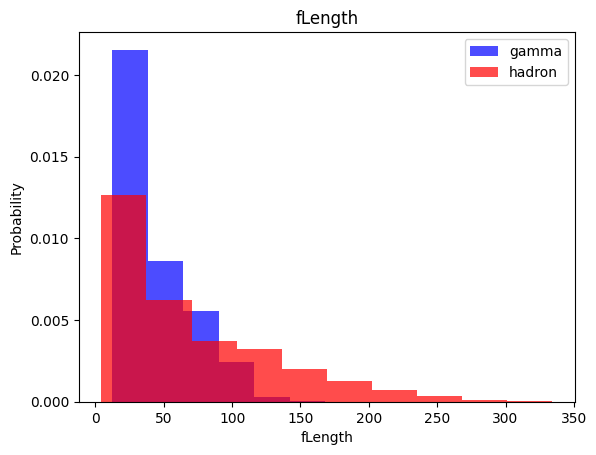

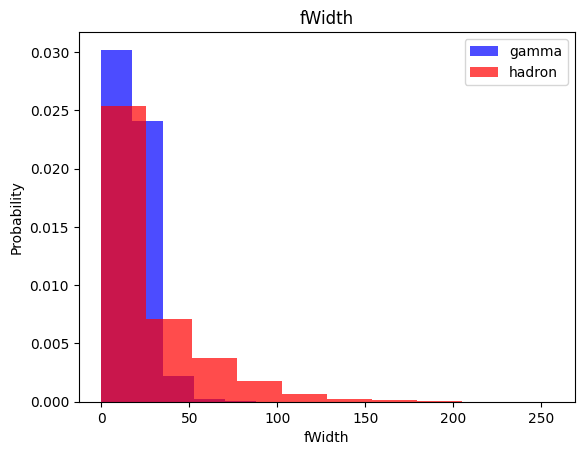

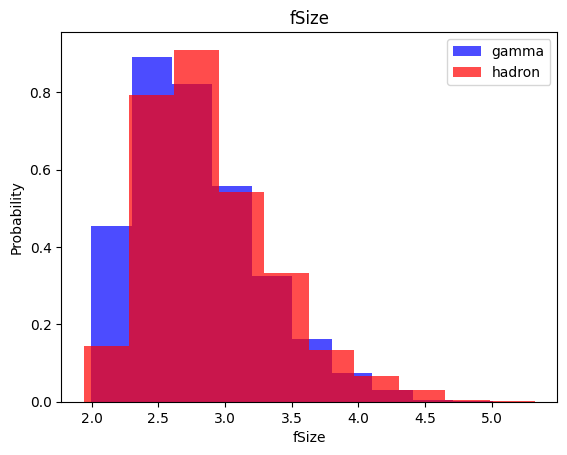

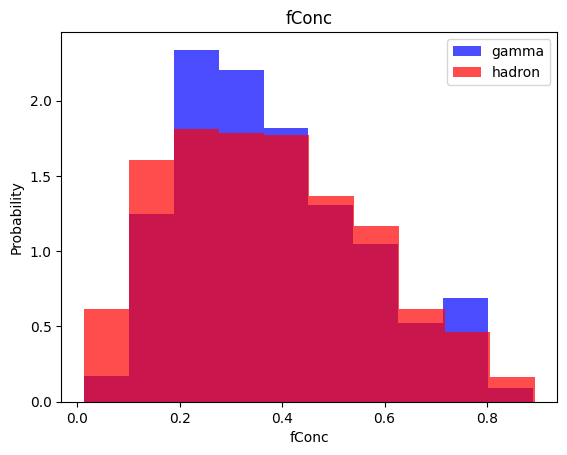

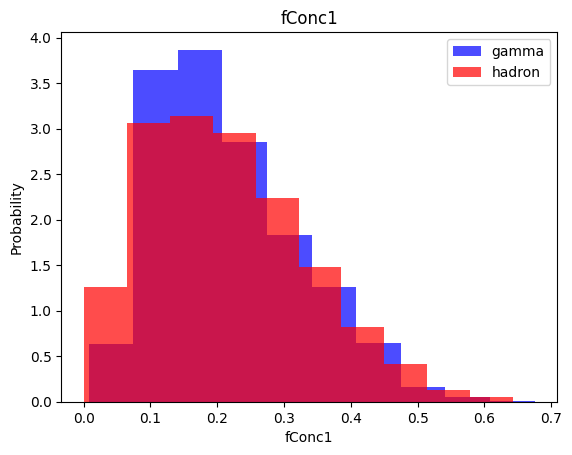

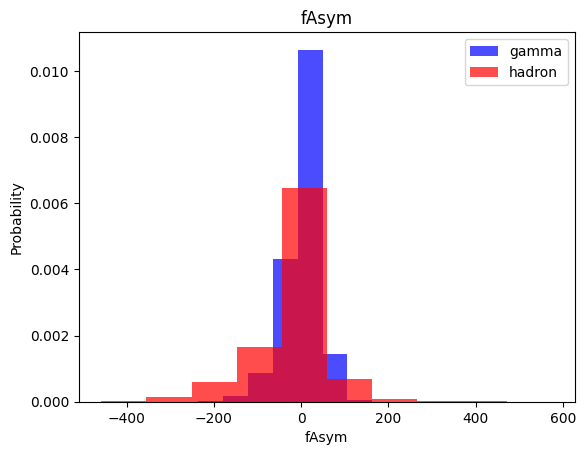

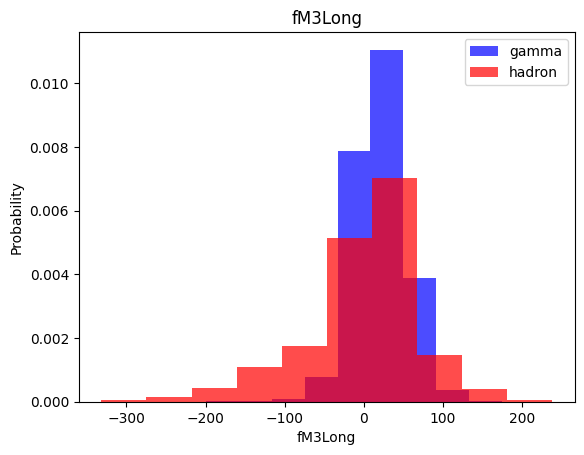

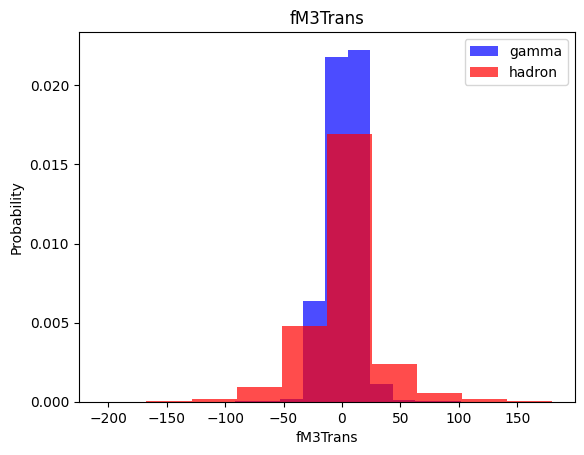

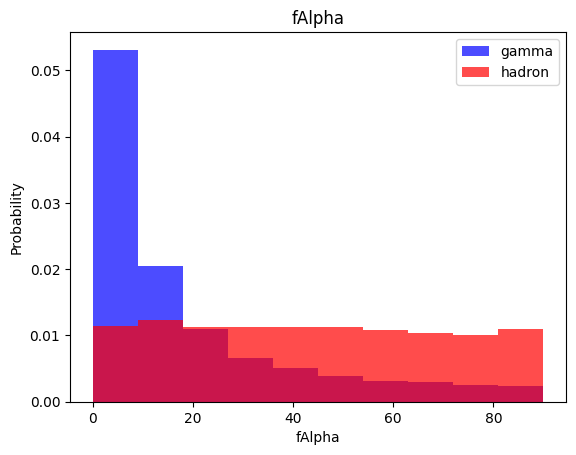

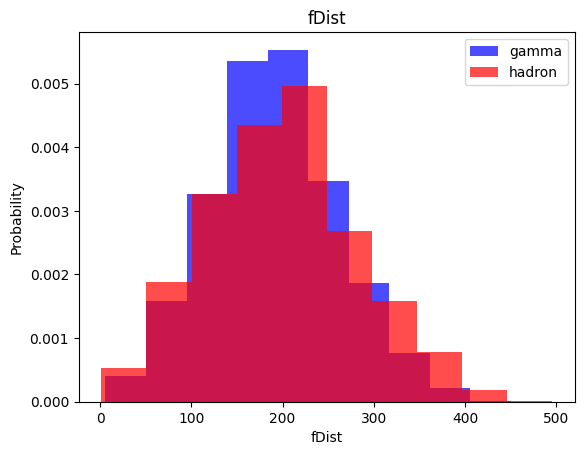

In [5]:
for label in cols[:-1]:
  #density = True normalizes the plot
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) # all the values in relation to class 1(Gamma(g))
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
#sampling basically suffles the data
#first split is at 60% so 0.6 for training, second split fron 60- 80% for validation
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  # the standard scaler helps in making the data's mean as 0 and S.D. as 1
  # u can see the values of length and conc are way off means the scale is very high
  # so to normalize them this below process is done
  scaler = StandardScaler()
  X = scaler.fit_transform(X)


  # since there is a big difference between the number of samples
  # we need to over sample the hadron
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y) #take the less class and over sample it, basically increasing the size of the smaller class


  #converting the data into a numpy array
  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [8]:
print(len(train[train["class"]==1])) #number of gamma
print(len(train[train["class"]==0])) #number of hadron

7360
4052


In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) #here oversampler is false because we want to see how our model performs on those
test, X_test, y_test = scale_dataset(test, oversample=False)

In [10]:
len(y_train)

14720

In [11]:
sum(y_train == 1)

7360

In [12]:
sum(y_train == 0)
#now they both's size is the same

7360

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report #for the report of the prediction

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1320
           1       0.86      0.86      0.86      2484

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes


In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [19]:
#prediction
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1320
           1       0.74      0.88      0.80      2484

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



##Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1320
           1       0.85      0.82      0.84      2484

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



##SVM



In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [25]:
svm_model = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1320
           1       0.85      0.82      0.84      2484

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



##NEURAL NETWORK

In [26]:
import tensorflow as tf

In [27]:
##epoch is basically one training cycle
def plot_loss(history):
  fig, (ax1,ax2) = plt.subplots(1, 2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()

  plt.show()

In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

16 nodes, droput 0, lr 0.1, batch size 32


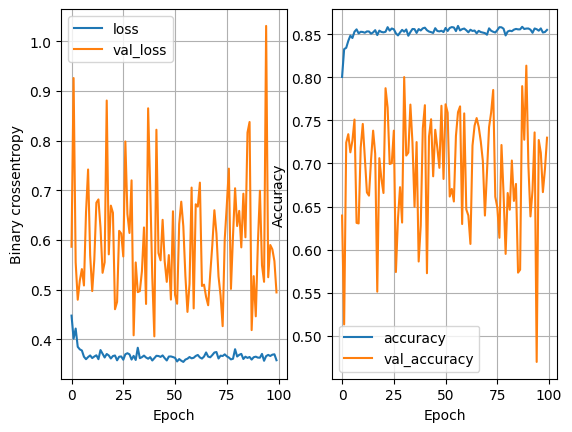

119/119 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8546
16 nodes, droput 0, lr 0.1, batch size 64


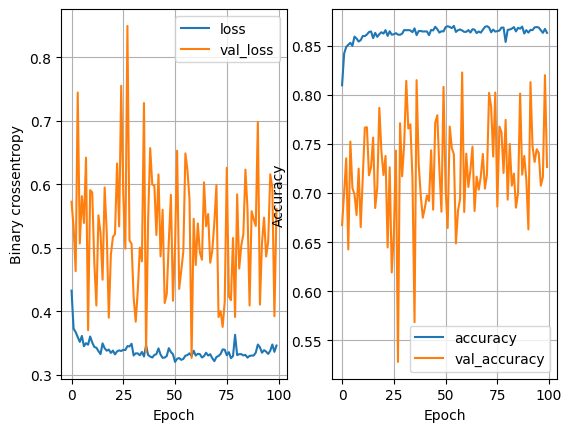

119/119 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8559
16 nodes, droput 0, lr 0.1, batch size 128


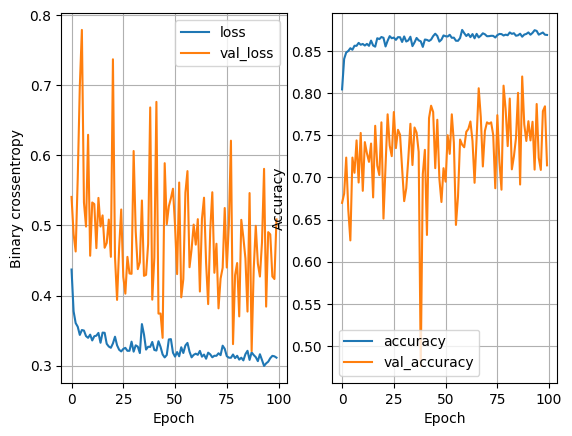

119/119 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8657
16 nodes, droput 0, lr 0.005, batch size 32


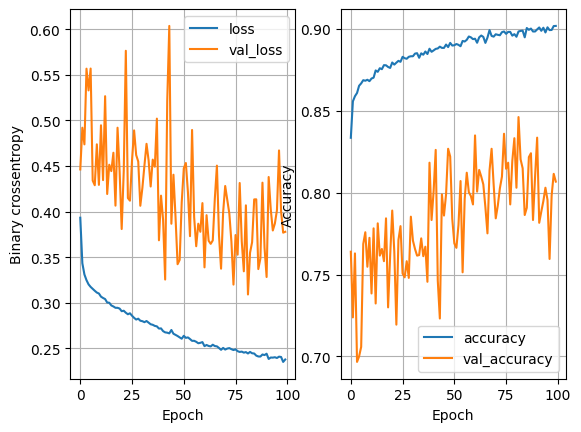

119/119 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8628
16 nodes, droput 0, lr 0.005, batch size 64


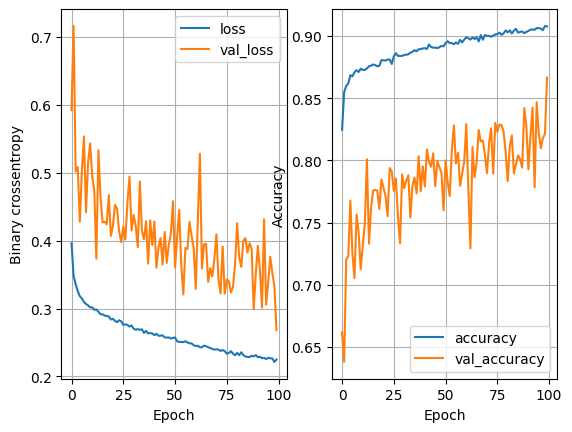

119/119 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8625
16 nodes, droput 0, lr 0.005, batch size 128


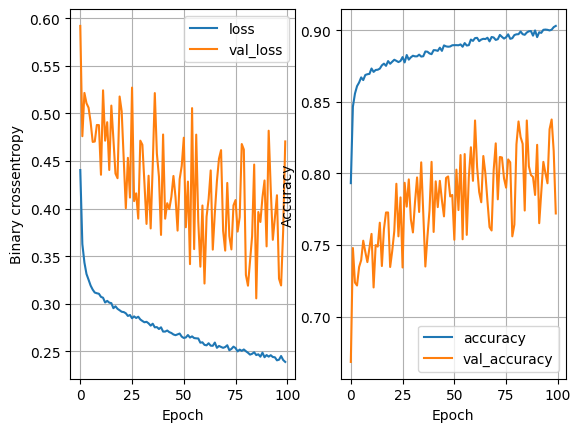

119/119 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8693
16 nodes, droput 0, lr 0.001, batch size 32


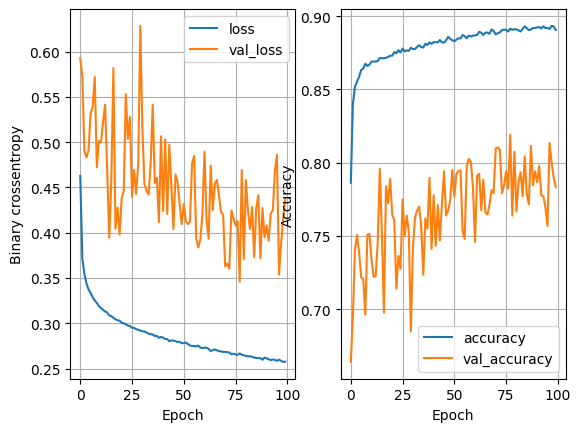

119/119 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8720
16 nodes, droput 0, lr 0.001, batch size 64


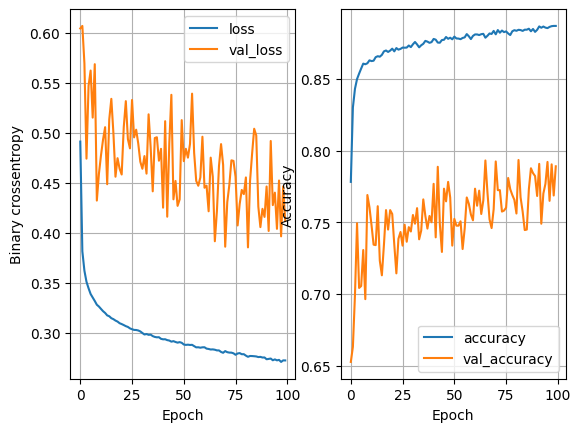

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8704
16 nodes, droput 0, lr 0.001, batch size 128


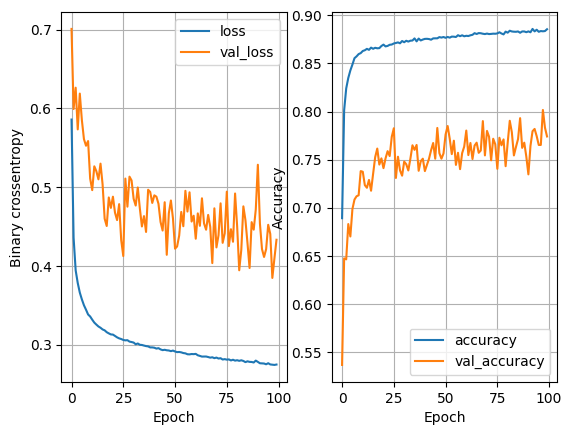

119/119 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8770
16 nodes, droput 0.2, lr 0.1, batch size 32


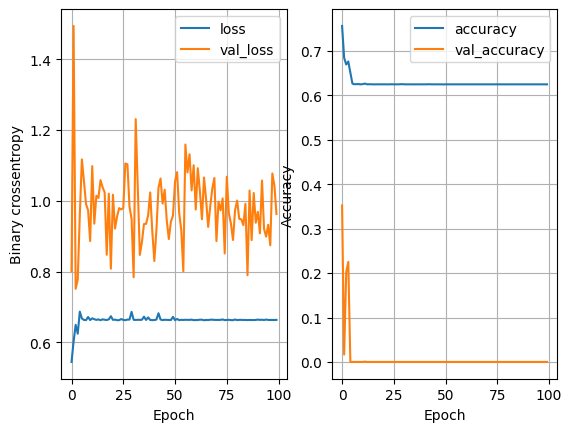

119/119 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6540
16 nodes, droput 0.2, lr 0.1, batch size 64


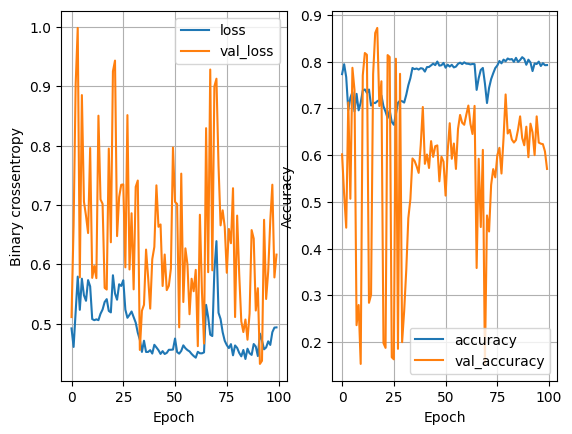

119/119 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.8252
16 nodes, droput 0.2, lr 0.1, batch size 128


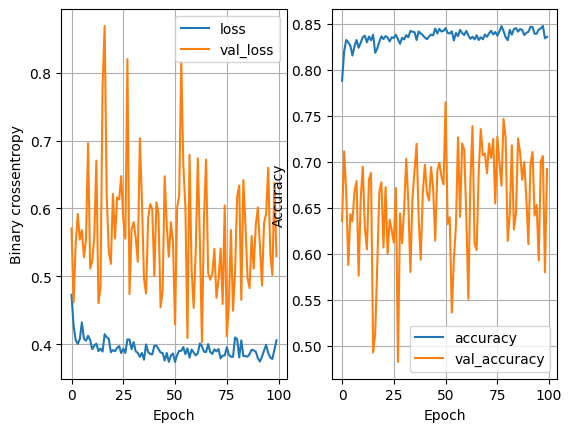

119/119 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8525
16 nodes, droput 0.2, lr 0.005, batch size 32


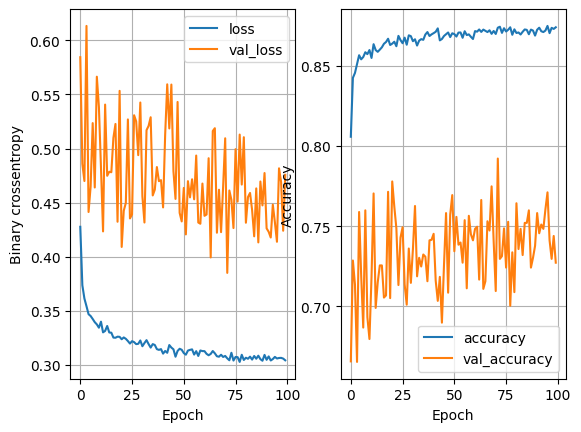

119/119 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8715
16 nodes, droput 0.2, lr 0.005, batch size 64


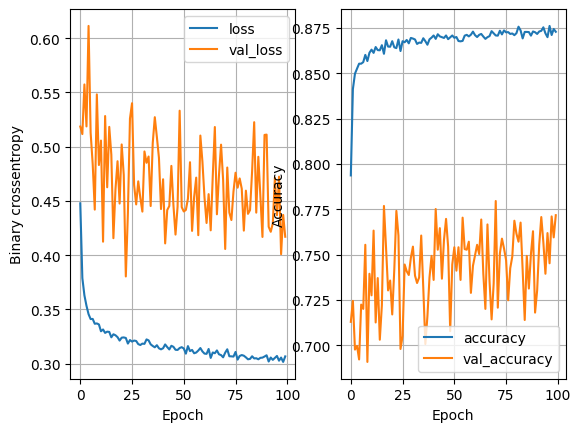

119/119 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8770
16 nodes, droput 0.2, lr 0.005, batch size 128


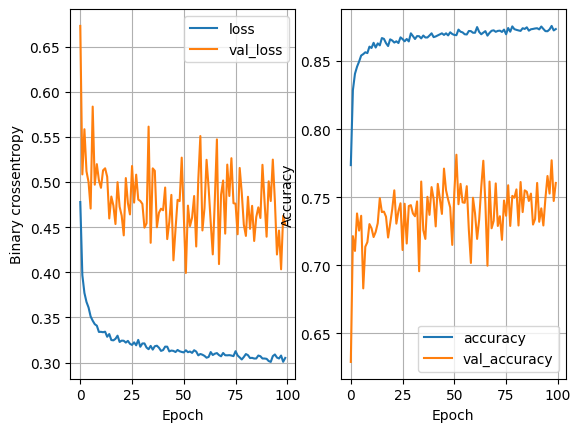

119/119 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8741
16 nodes, droput 0.2, lr 0.001, batch size 32


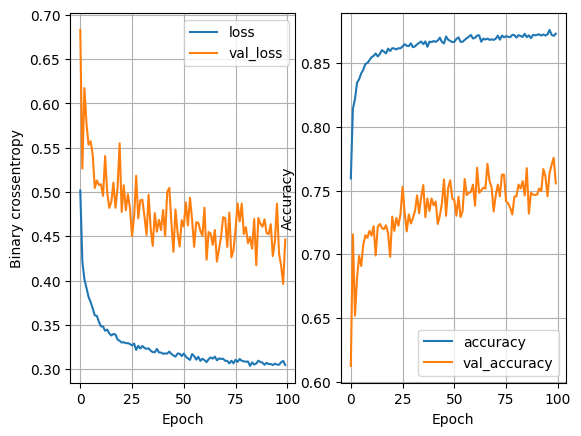

119/119 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8736
16 nodes, droput 0.2, lr 0.001, batch size 64


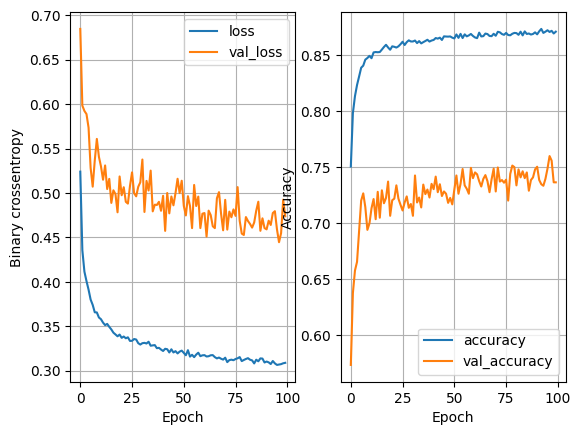

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8720
16 nodes, droput 0.2, lr 0.001, batch size 128


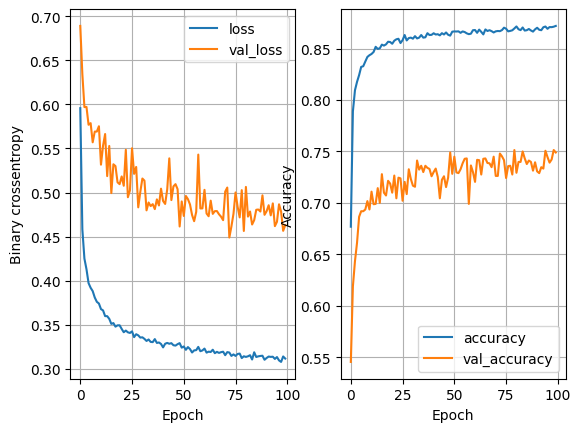

119/119 [==============================] - 1s 3ms/step - loss: 0.3070 - accuracy: 0.8738
32 nodes, droput 0, lr 0.1, batch size 32


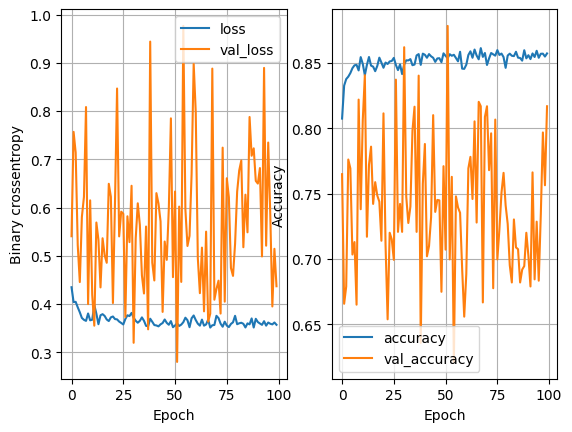

119/119 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8520
32 nodes, droput 0, lr 0.1, batch size 64


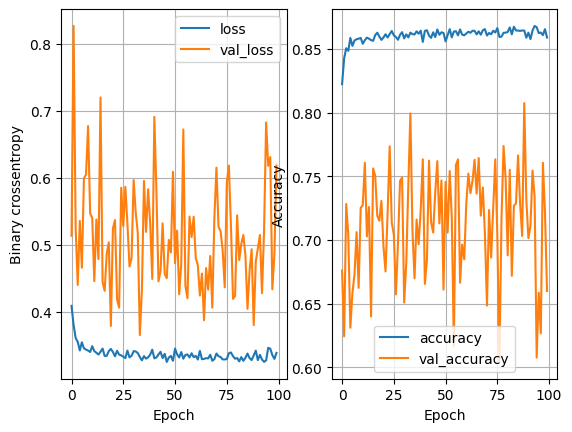

119/119 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8515
32 nodes, droput 0, lr 0.1, batch size 128


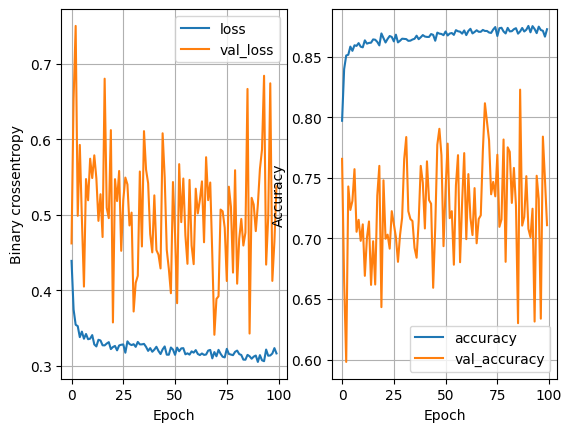

119/119 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8588
32 nodes, droput 0, lr 0.005, batch size 32


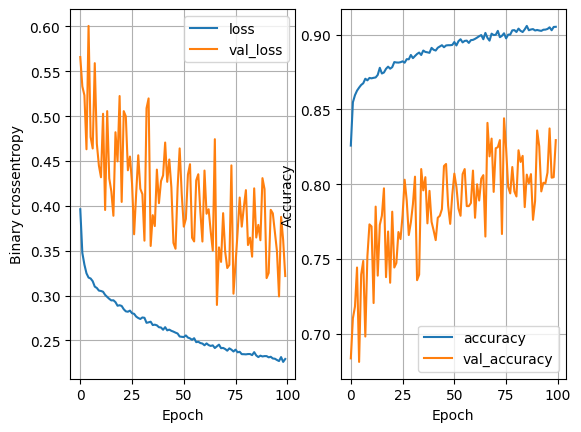

119/119 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8675
32 nodes, droput 0, lr 0.005, batch size 64


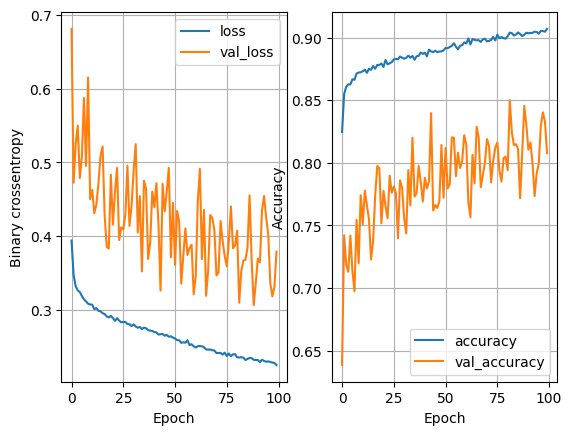

119/119 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8665
32 nodes, droput 0, lr 0.005, batch size 128


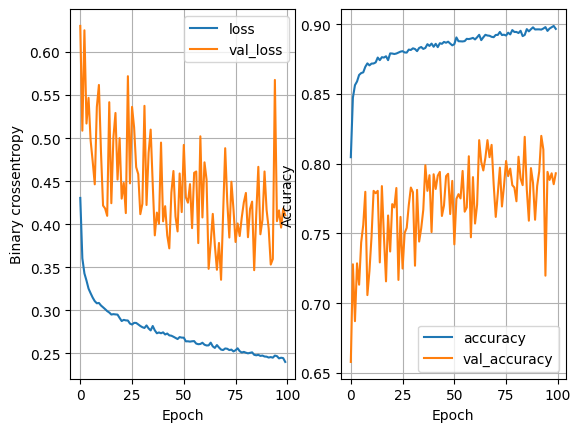

119/119 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8657
32 nodes, droput 0, lr 0.001, batch size 32


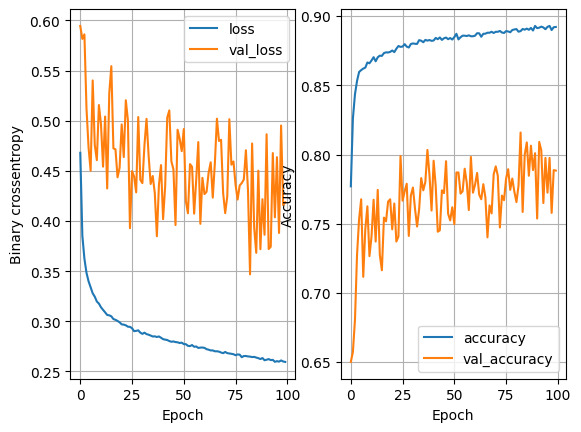

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8717
32 nodes, droput 0, lr 0.001, batch size 64


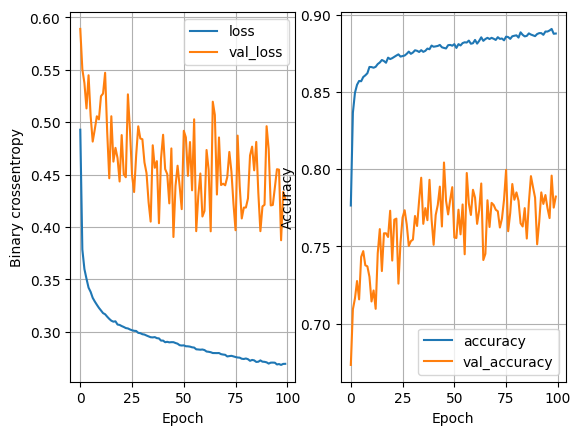

119/119 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8707
32 nodes, droput 0, lr 0.001, batch size 128


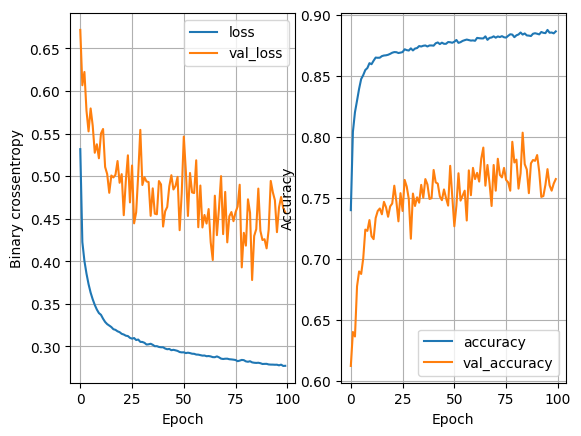

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8775
32 nodes, droput 0.2, lr 0.1, batch size 32


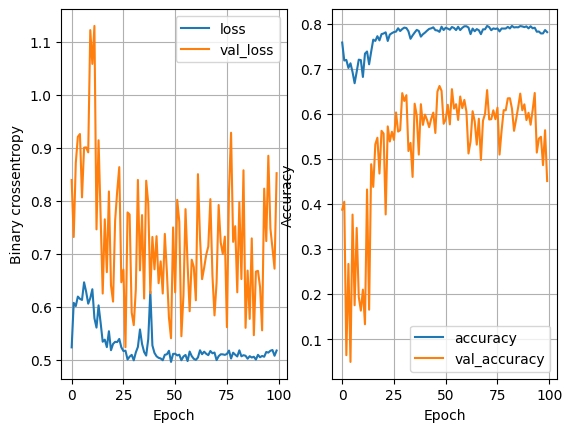

119/119 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7984
32 nodes, droput 0.2, lr 0.1, batch size 64


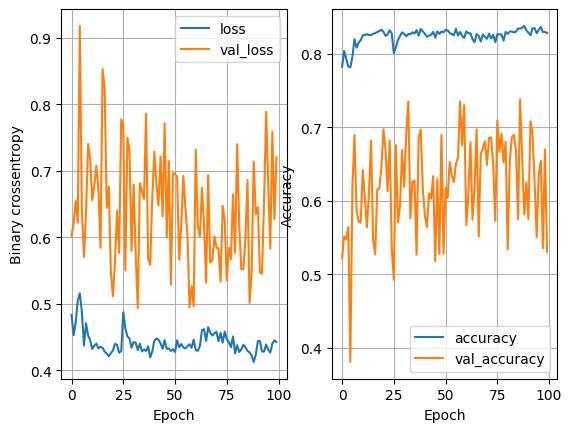

119/119 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8233
32 nodes, droput 0.2, lr 0.1, batch size 128


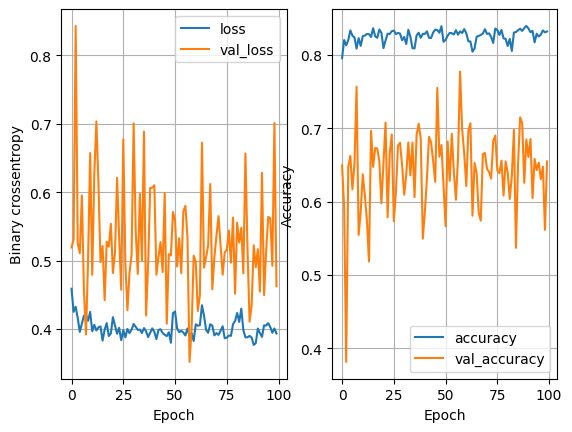

119/119 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8512
32 nodes, droput 0.2, lr 0.005, batch size 32


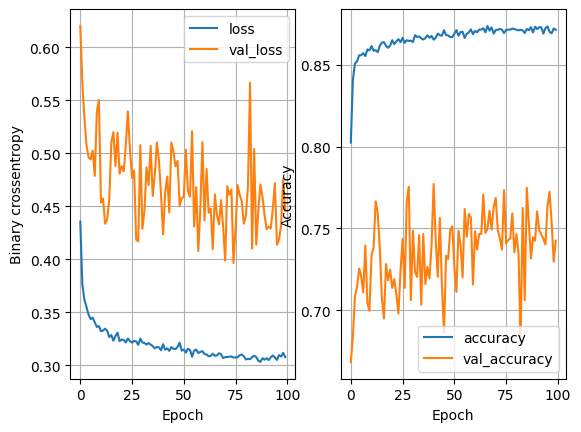

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8754
32 nodes, droput 0.2, lr 0.005, batch size 64


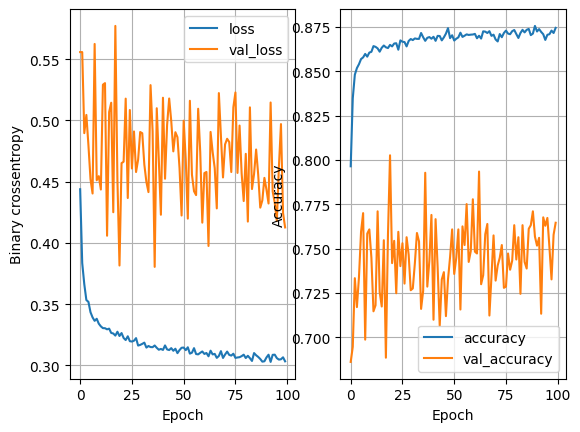

119/119 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8738
32 nodes, droput 0.2, lr 0.005, batch size 128


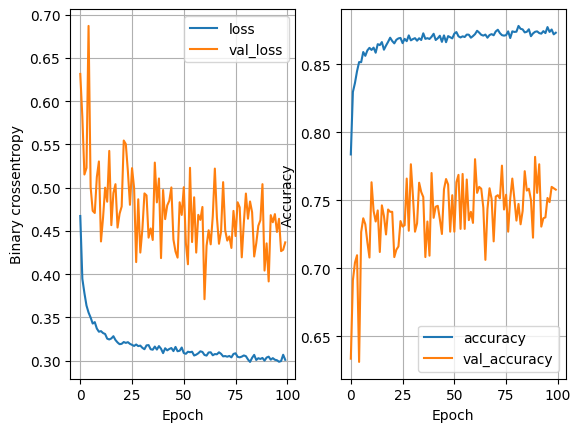

119/119 [==============================] - 1s 3ms/step - loss: 0.2964 - accuracy: 0.8785
32 nodes, droput 0.2, lr 0.001, batch size 32


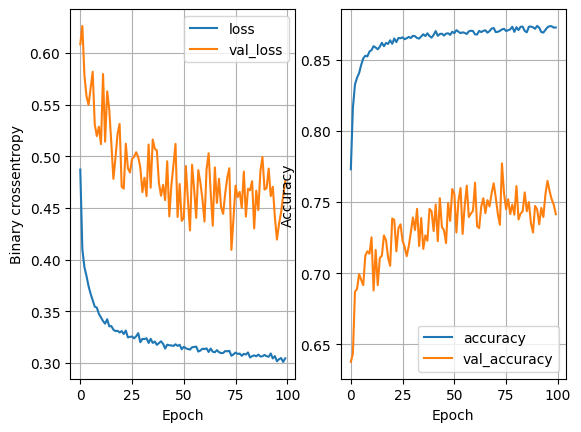

119/119 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8783
32 nodes, droput 0.2, lr 0.001, batch size 64


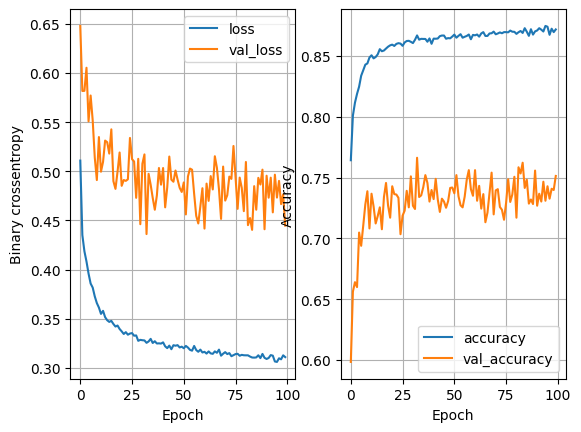

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8693
32 nodes, droput 0.2, lr 0.001, batch size 128


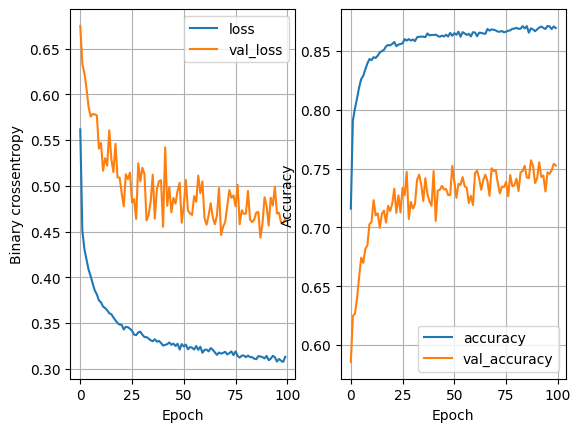

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8738
64 nodes, droput 0, lr 0.1, batch size 32


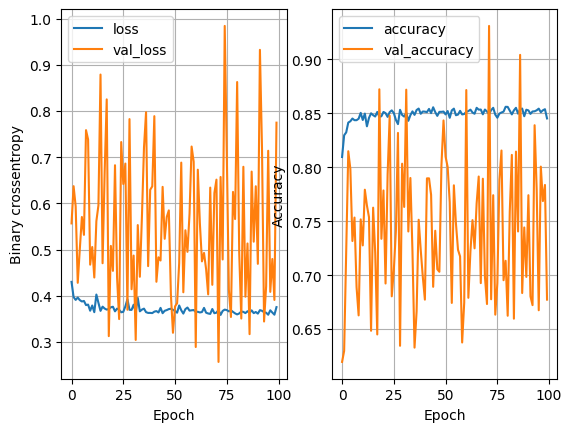

119/119 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8565
64 nodes, droput 0, lr 0.1, batch size 64


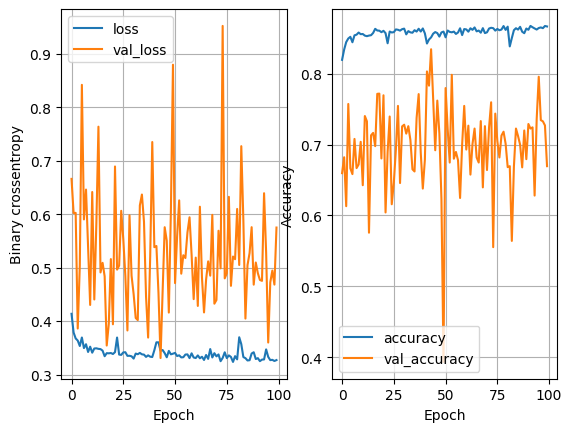

119/119 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8552
64 nodes, droput 0, lr 0.1, batch size 128


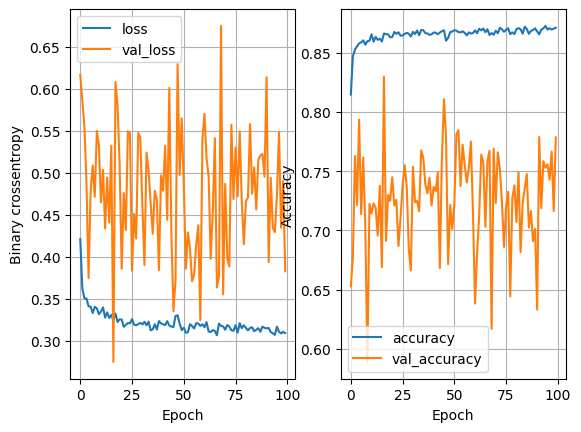

119/119 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8599
64 nodes, droput 0, lr 0.005, batch size 32


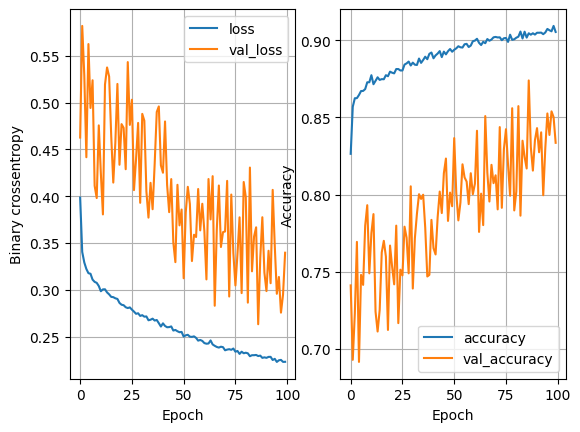

119/119 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8646
64 nodes, droput 0, lr 0.005, batch size 64


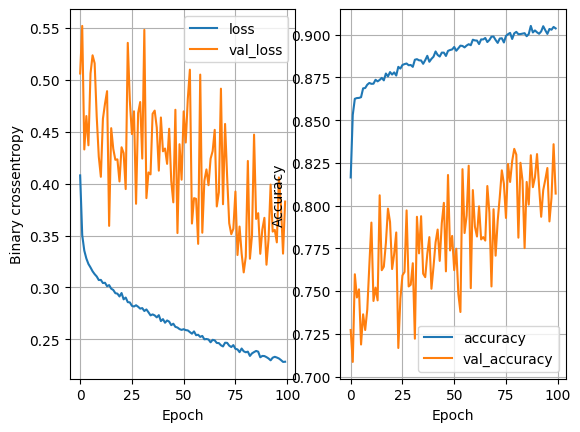

119/119 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8683
64 nodes, droput 0, lr 0.005, batch size 128


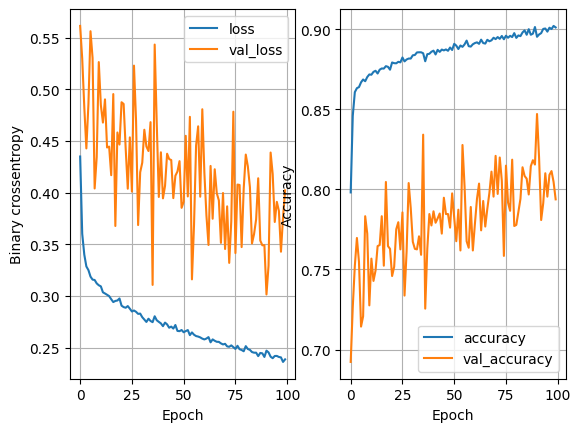

119/119 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8644
64 nodes, droput 0, lr 0.001, batch size 32


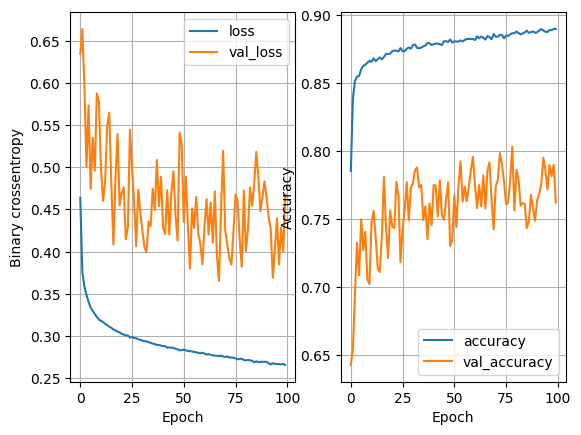

119/119 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.8696
64 nodes, droput 0, lr 0.001, batch size 64


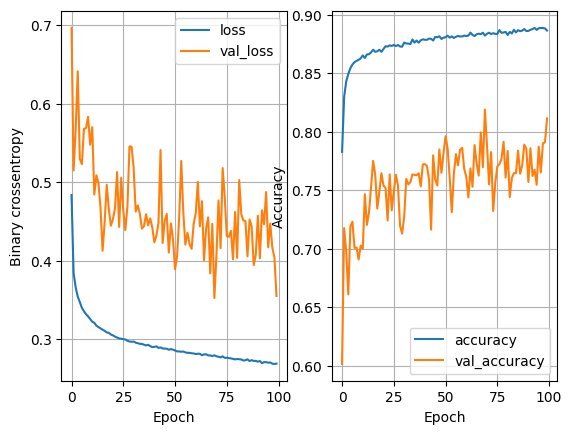

119/119 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8691
64 nodes, droput 0, lr 0.001, batch size 128


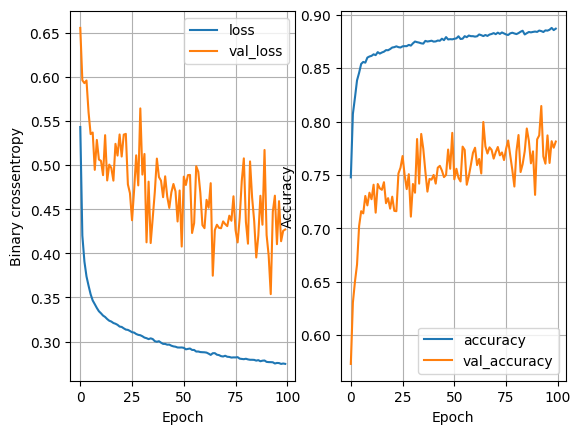

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8701
64 nodes, droput 0.2, lr 0.1, batch size 32


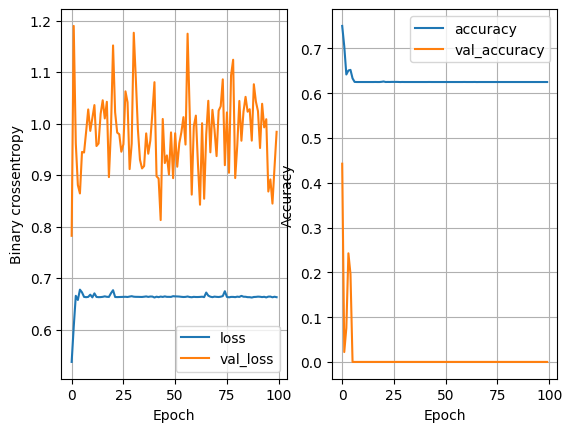

119/119 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6540
64 nodes, droput 0.2, lr 0.1, batch size 64


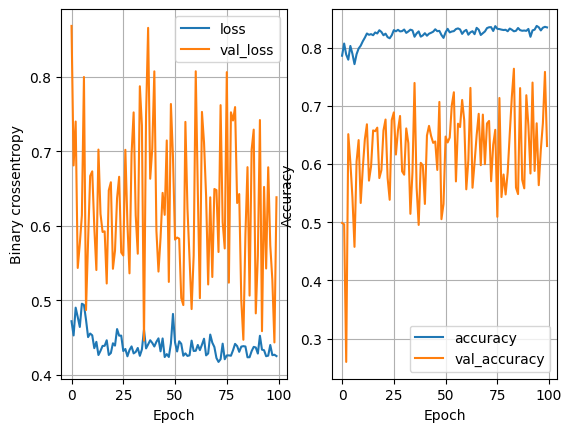

119/119 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8423
64 nodes, droput 0.2, lr 0.1, batch size 128


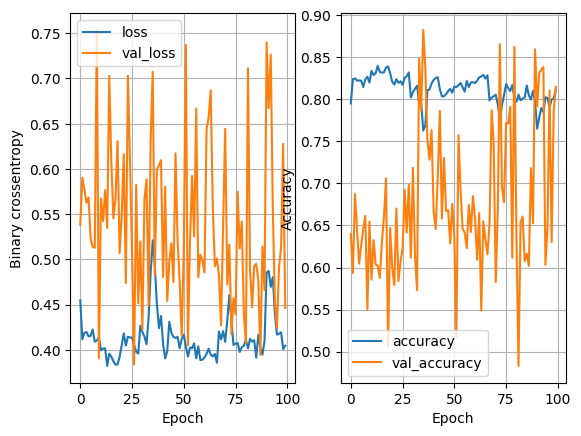

119/119 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8404
64 nodes, droput 0.2, lr 0.005, batch size 32


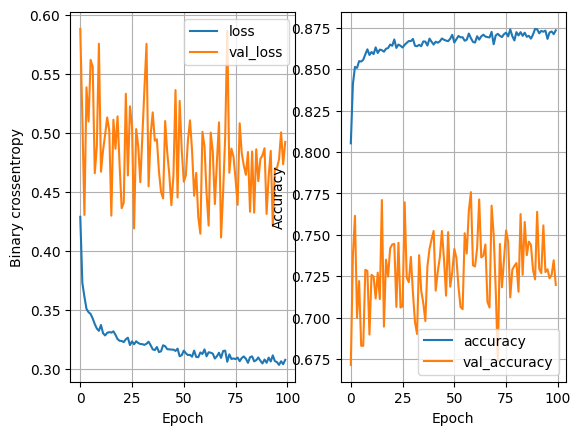

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8654
64 nodes, droput 0.2, lr 0.005, batch size 64


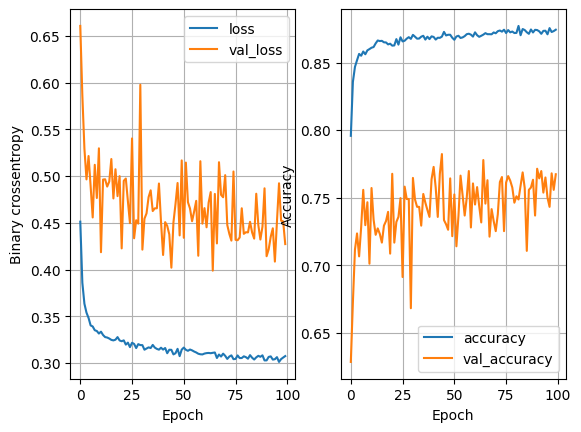

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8733
64 nodes, droput 0.2, lr 0.005, batch size 128


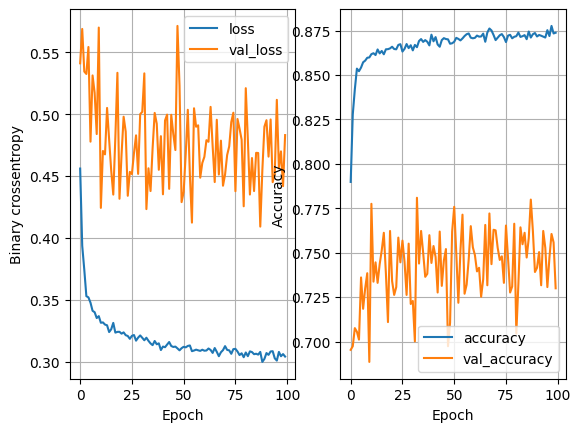

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8743
64 nodes, droput 0.2, lr 0.001, batch size 32


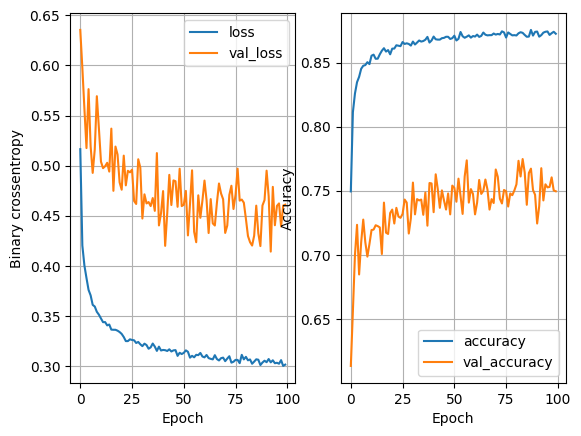

119/119 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.8775
64 nodes, droput 0.2, lr 0.001, batch size 64


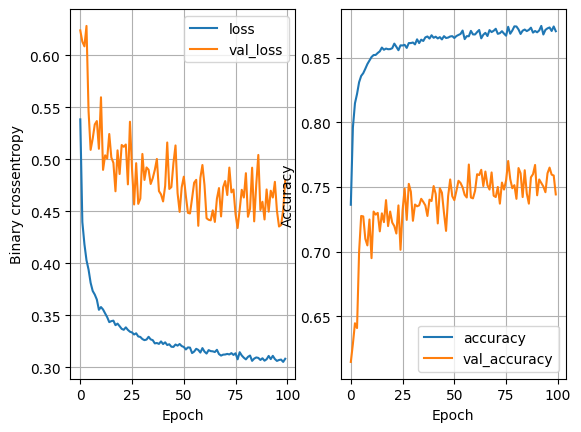

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8754
64 nodes, droput 0.2, lr 0.001, batch size 128


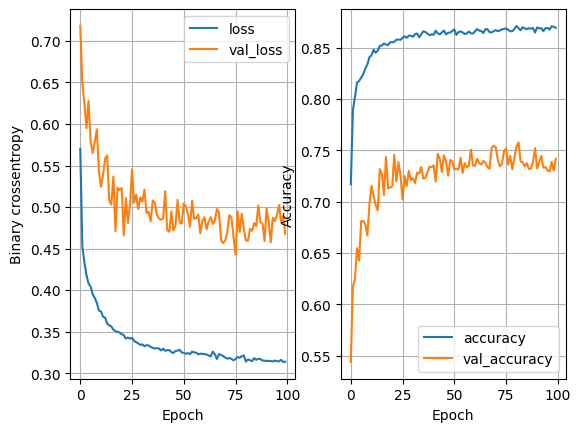

119/119 [==============================] - 1s 3ms/step - loss: 0.3070 - accuracy: 0.8709


In [29]:
least_val_loss = float('inf')  #infinity
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, droput {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model



In [30]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1320
           1       0.88      0.93      0.91      2484

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

